# <center> <h1> CARACTERIZAR CLIENTES GRUPO EMPRESARIAL EFPE   </h1> </center>


<div style="text-align: justify;">
    <p> Con el propósito de optimizar la estrategia comercial, y obtener resultados robustos, se lleva a cabo análisis de segmentación y caracterización de la encuesta recolectada en el presente estudio. El enfoque de esta sección está enfocado a obtener insights mediante modelos matemáticos identificación de patrones y comportamientos únicos presentes en la audiencia. Este proceso se traducirá en la obtención de conocimientos profundos respaldados por datos cuantitativos, lo que a su vez nos capacitará para una comprensión más sólida de las preferencias, necesidades y perfiles demográficos de los clientes.

# espacio para dettalar o incertar cuadro de variables relevantess







La variable "Recomendaría EFPE a sus familiares o amigos" se consideró como variable dependiente (denotada como "y"), siguiendo el razonamiento que a continuación se expone: <br>

- Aquellos individuos que respondieron afirmativamente a esta pregunta dan señales significativas de satisfacción con las propuestas y servicios que ofrece la empresa. Por lo tanto, se busca caracterizar al cliente a través de esta característica. <br>

- Esta variable presenta tres categorías de probabilidad: alta, media y baja. Se ha codificado la categoría de alta probabilidad como 1, mientras que las demás categorías se han codificado como cero, indicando una probabilidad baja.

In [52]:
# importar librerías necesarias para el análisis econométrico
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn import metrics

In [53]:
# importar data
data = pd.read_csv('../data/data_dummy.csv', sep = ';', encoding='latin1')

#show the first rows of data
data.head(3)

,dispu_cursos,seguir_efpe,y,edad,area_conoci_Ciencia de datos,area_conoci_Ciencias políticas,area_conoci_Contratación Estatal,area_conoci_Finanzas,area_conoci_Finca Raíz,area_conoci_Otro,...,r_social_Me es indiferente,r_social_WhatsApp,r_social_YouTube,valor_mes_mes 300 y 400,valor_mes_mes 50 y 100,valor_año_año 600 y 700,valor_año_año 700 y 800,educacion_Postgrado,educacion_Profesional,genero_Masculino
0,5,4,1,28,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,5,1,1,26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,2,0,26,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


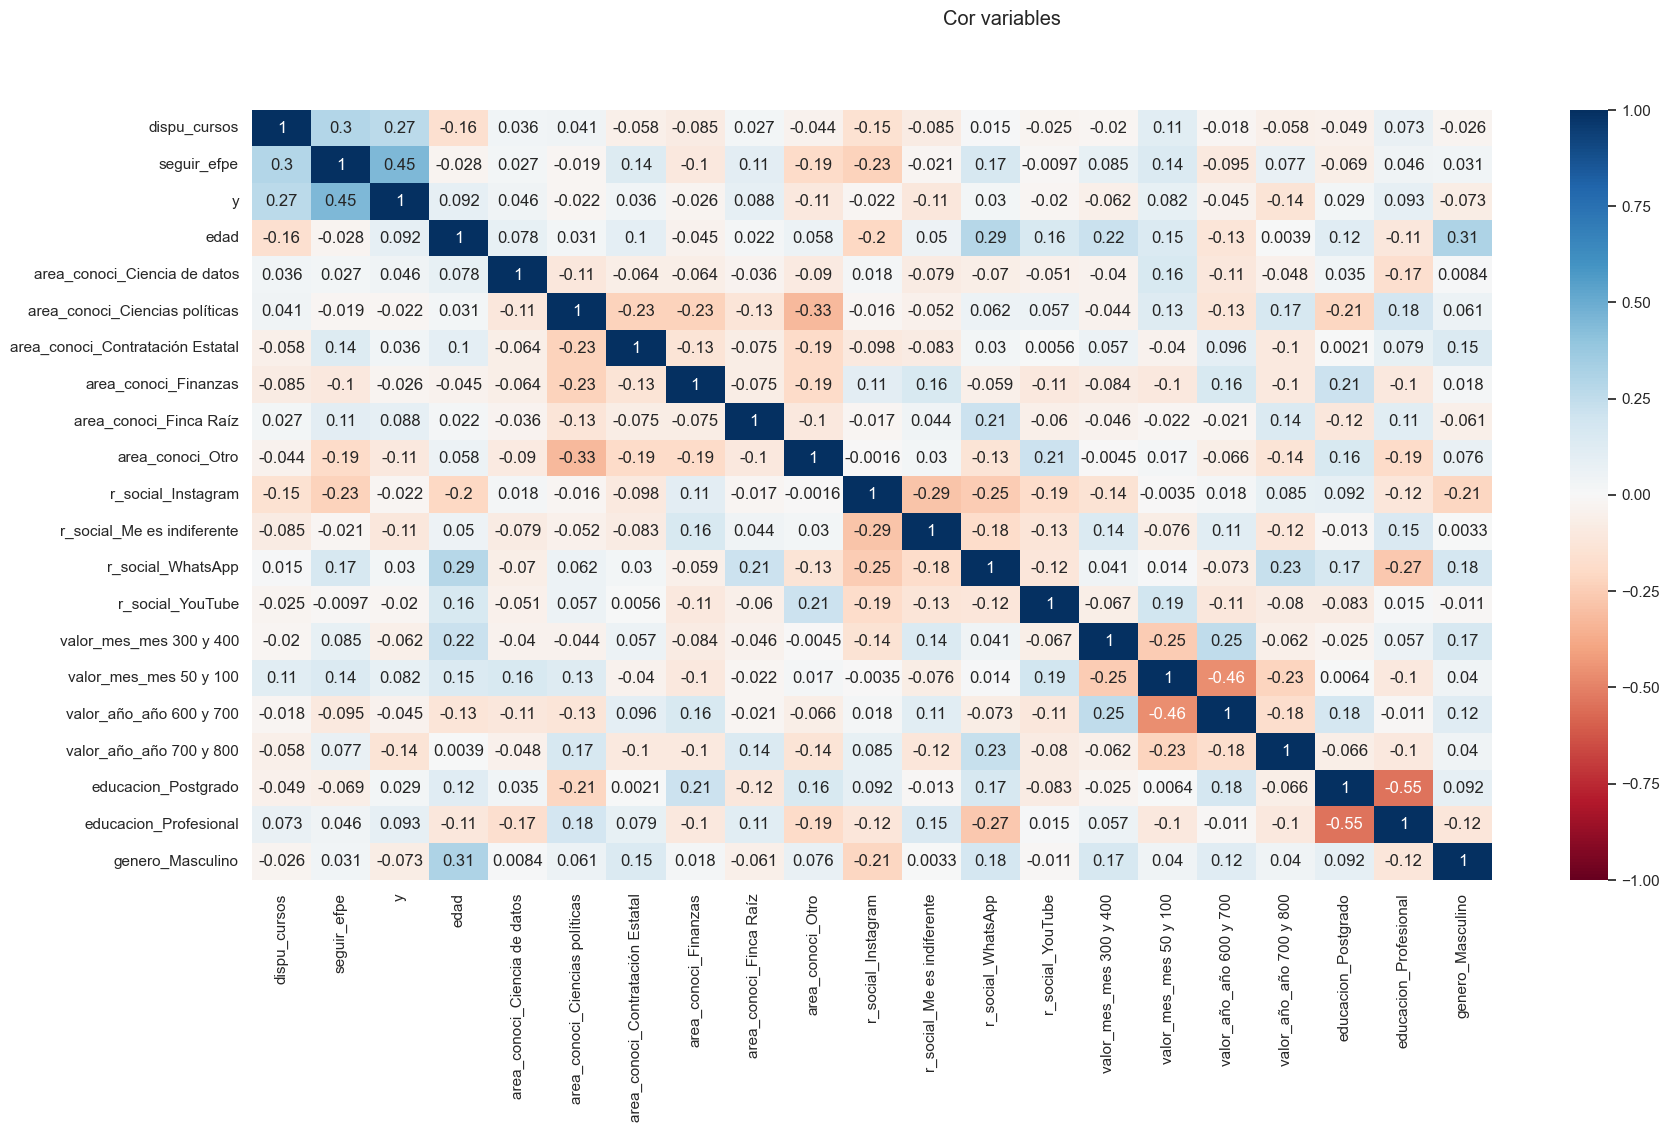

In [54]:
# correlación entre variables 
plt.figure(figsize=(20,10))
sns.heatmap(
    data.corr(),
    annot= True,
    cmap = "RdBu",
    vmax= 1,
    vmin= -1)
plt.suptitle('Cor variables')
plt.show()

## Estimación del modelo 

In [55]:
# Codificar variable objetivo y regresoras 
y = data['y']
X = data.drop('y', axis = 1)

Dado el conjunto de datos recolectados la variable de respuesta binaria $y$ <br>
(1 para mayor probabilidad de adquirir un curso , 0 de adquirir un curso ) <br>
expresando la función logística de la siguiente manera:  

$ f(z)  =  \frac{exp(z)}{1 + exp(z)} $

Donde:

$ \log  $ $\left(\frac{p}{1 - p}\right) = B_o  + B_1X_1 + B_2X_2 + B_3X_3 ...  B_nX_n 
    $

* $p$ es la probabilidad de éxito (evento binario).
* $ \log  $ $\left(\frac{p}{1 - p}\right)$ es el logaritmo de la razón de probabilidades (log-odds).
* $B_0 + B_1 + B_3 ... B_n$ son los coeficientes del modelo que se estiman.

Este modelo se ajusta utilizando la función de enlace logit, que relaciona la log-odds con las <br>
variables predictoras. Los coeficientes $B_0 + B_1 + B_3 ... B_n$ se estiman utilizando métodos de <br>
estimación de máxima verosimilitud.
​


In [56]:
#crear objeto modelo
model = LogisticRegression(class_weight= "balanced", max_iter= 500)

In [57]:
# mostrar shape de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (80, 20), X_test shape: (21, 20), y_train shape: (80,), y_test shape: (21,)


In [58]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [59]:
# hacer las predicciones del modelo sobr el test 
prediccion = model.predict(X_test)

## Validación del modelo <br>
El accuracy se utiliza para evaluar la precisión de un modelo de machine learning en términos de sus predicciones. Representa la proporción de predicciones correctas realizadas por el modelo en comparación con el total de predicciones realizadas. Cuanto más alto sea el valor del accuracy, mejor será la capacidad del modelo para realizar predicciones precisas.

Esta se define como:

$ Accuracy =  \frac{Nuˊ mero de predicciones correctas}{Total de predicciones} $

In [60]:
# Para el score  accuracy, se envia el valor corecto sobre el estimado
print(f'El accyracy del modelo es: {metrics.accuracy_score(y_test, prediccion)}')

El accyracy del modelo es: 0.8571428571428571


Al analizar los resultados, se destaca un valor de accuracy igual a 0.85, lo que significa que <br>
alrededor del 85% de las predicciones realizadas por el modelo son acertadas. Esta métrica nos <br> proporciona una medida general de la precisión del modelo en términos de clasificación correcta.

Axes(0.125,0.11;0.775x0.77)


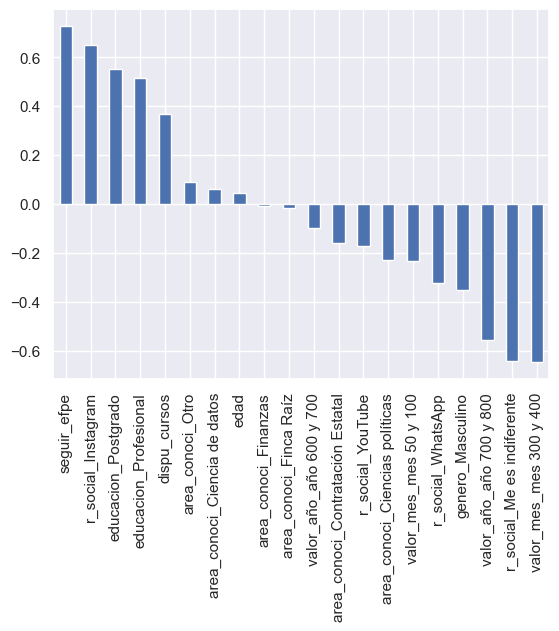

In [61]:
# se llama a las variables con más peso en el modelo preddicho

pesos = pd.Series(model.coef_[0],
                    index=X.columns.values)

# Se grafican las variables 
print(
    pesos.sort_values(ascending=False)[:
    
    ].plot(kind='bar')
)
plt.show()

El modelo proporciona valiosos conocimientos que están en perfecta consonancia con <br>
los análisis complementarios llevados a cabo en el capítulo anterior de análisis descriptivo. <br>
Estos resultados destacan lo siguiente: <br><br>

- Una vez los usuarios acceden a la plataforma, muestran una propensión significativa a <br>
 adquirir cursos o recomendarlos a sus contactos, contribuyendo así al crecimiento orgánico de la clientela. <br><br>

- Entre las diversas redes sociales, Instagram emerge como la que más impacta en la adquisición de productos <br>
 de EFPE, resaltando su influencia en la estrategia de marketing. <br><br>

- Los usuarios de los cursos expresan preferencia por la modalidad de pago anual en lugar de la suscripción <br>
 mensual, influenciados por el valor económico que supone esta elección. <br><br>

- En cuanto a las áreas de conocimiento, ciencia de datos y finanzas emergen como las más favorecidas por los <br>
 encuestados, evidenciando un alto nivel de aceptación entre la audiencia. <br><br>

Estos descubrimientos profundizan la comprensión de los patrones y tendencias del comportamiento de los usuarios,<br>
 enriqueciendo así la base de conocimientos para la toma de decisiones estratégicas y la mejora continua de los<br>
  servicios proporcionados por EFPE.